# Transformation der Daten

In diesem Notebook sollen vorher verarbeitete Daten der Filmzusammenfassungen genutzt werden, um einen weiteren Mehrwehrt zu generieren. Das Ziel ist es, die Funktionalität eines konkreten Anwendungsfalls von Machine Learnining (ML) im Bereich der Filme zu realisieren.

### Problemstellung

Wir möchten uns in diesem Projekt letztendlich damit beschäftigen, eine Clusteringalgorithmus zu entwerfen, welcher uns eine Ähnlichkeitsanalyse von Filmen erlaubt. Dieses Thema interessiert und vor allem, da es ein konkreten Anwendungsfall für die Vorhersage von ähnlichen Filmen, gerade im Bereich des Onlinestreamings, darstellt. Zudem können wir uns mit einem aus der Vorlesung bekannten Clustering-Algorithmus beschäftigen und darauf aufbauend unser Wissen vertiefen.

### Anwendungsbeispiel

Die amerikanische Onlinestreaming-Plattform [Netflix](https://www.netflix.com/de-en/) bietet beispielsweise ein Feature, wobei weitere Vorschläge, basierend auf dem Konsum des Kunden, dargestellt werden. 

* TODO: BILD

Welche Datenbasis hierfür verwendet wird ist unklar. Es kommen generell mehrere Quellen in Frage:

* Bewertungen des Nutzers
* Streaming-Verlauf des Nutzers
* Filme des gleichen Genres
* Inhaltlich ähnliche Filme
* Filmneuheiten
* uvm.

Welche Quelle Netflix für ihr Feature nutzt bleibt unklar. Sehr wahrscheinlich handelt es sich dabei um eine Kombination vorherigen Quellen. 

### Idee

Wir möchten uns im Rahmen dieses Projekts mit einer Variante dieses Features beschäftigen, der Generierung von Vorschlägen basierend auf inhaltlicher Ähnlichkeit. Hierzu nutzen wir inhaltliche Zusammenfassungen der Filme in Textform, welche wir durch einen selbstgeschriebenen Crawler generiert haben.

## Module importieren

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import spacy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Daten einlesen

In [2]:
PATH_TO_DATA = '../data/movies.json'
# JSON Daten in Dataframe lesen
data = pd.read_json(PATH_TO_DATA)

In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
disclaimer = 'It looks like we don\'t have a Synopsis for this title yet.'
for index, movie in data.iterrows():
    if disclaimer in movie['synopsis']:
        data = data.drop(index)
print(len(data))

237


In [5]:
processed_data = []
for index, movie in data.iterrows():
    # Berechnen der Anzahl an Wörtern
    processed_data.append({'title': movie['title'], 'bow': ' '.join([str(token.lemma_).lower() for token in nlp(movie['synopsis']) if not token.ent_type_ and not token.is_stop and not token.is_punct and token.pos_ != 'VERB'])})
data = pd.DataFrame(processed_data)

Das DataFrame sieht nun folgendermaßen aus:

In [6]:
data.head()

,title,bow
0,The Shawshank Redemption,banker wife lover golf pro state death penalty...
1,The Dark Knight,movie gang man clown mask bank mob large porti...
2,The Godfather,guest wedding reception daughter connie head f...
3,The Godfather: Part II,godfather ii parallel storyline chief event mo...
4,Pulp Fiction,restaurant young couple pro con bank versus li...


## Bag of Words in Datei schreiben

Damit wir die Vorverarbeitung der Daten nicht bei jedem Neustart des Trainingsprozesses durchführen müssen, schreiben wir eine neue Datei.

In [14]:
data.to_csv("../data/bag_of_words.csv")

## Features

* Word-Matrix
* Frequency
* Normalisieren

TODO: Vektorisieren etc. selbst machen?

In [214]:
# Matrix von Token mit Frequenz plus Normalisieren mittels "Inverse-document-frequency" (IDF)
vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.2, ngram_range=(1,3))
# Lernen des Vokabulars und IDF
X = vectorizer.fit_transform(data['bow'])

In [215]:
X.shape

(237, 196)

In [216]:
X.toarray()

array([[0.0353196 , 0.02406543, 0.        , ..., 0.02499595, 0.07219628,
        0.01581857],
       [0.04885937, 0.02219394, 0.04252334, ..., 0.        , 0.02219394,
        0.02917682],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.12084285],
       ...,
       [0.        , 0.        , 0.04800141, ..., 0.        , 0.        ,
        0.06587104],
       [0.        , 0.        , 0.        , ..., 0.07059206, 0.        ,
        0.13402154],
       [0.0483163 , 0.06584177, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [217]:
# Vokabular
feature_names = vectorizer.get_feature_names()
feature_names

['able',
 'action',
 'actually',
 'alive',
 'angry',
 'apartment',
 'apparently',
 'area',
 'arm',
 'attack',
 'attempt',
 'attention',
 'away',
 'bad',
 'bar',
 'battle',
 'bed',
 'big',
 'black',
 'blood',
 'body',
 'book',
 'boy',
 'brother',
 'building',
 'business',
 'car',
 'case',
 'chance',
 'charge',
 'child',
 'city',
 'close',
 'company',
 'completely',
 'control',
 'conversation',
 'couple',
 'crime',
 'dark',
 'daughter',
 'day',
 'dead',
 'death',
 'despite',
 'different',
 'doctor',
 'door',
 'earlier',
 'end',
 'entire',
 'escape',
 'event',
 'eventually',
 'eye',
 'face',
 'fact',
 'family',
 'far',
 'father',
 'fight',
 'film',
 'final',
 'finally',
 'fire',
 'floor',
 'food',
 'foot',
 'force',
 'free',
 'friend',
 'game',
 'girl',
 'good',
 'great',
 'ground',
 'group',
 'guard',
 'gun',
 'hand',
 'happy',
 'hard',
 'head',
 'help',
 'high',
 'home',
 'hospital',
 'house',
 'husband',
 'idea',
 'immediately',
 'information',
 'inside',
 'instead',
 'job',
 'large',


In [218]:
len(feature_names)

196

## Clustering

* Um evaluieren zu koennen 1- len(data) - 1 Cluster ausprobieren, inertia abspeichern und in Graph visualisieren
* k waehlen mit Begruendung

In [219]:
wss = []
limit = 11
for k in range(1, limit):
    model = KMeans(n_clusters=k, max_iter=100)
    model.fit(X)
    wss.append(model.inertia_)

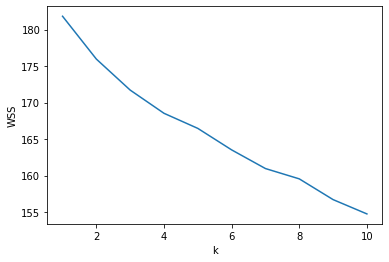

In [220]:
plt.plot(range(1, limit), wss)
plt.xlabel('k')
plt.ylabel('WSS')
plt.show()

## Ergebnisevaluierung

In [221]:
k = 7
model = KMeans(n_clusters=k, init='k-means++', max_iter=100)
model.fit(X)

KMeans(max_iter=100, n_clusters=7)

In [222]:
model.n_iter_

12

In [223]:
model.inertia_

161.57974963554037

In [224]:
data['cluster'] = model.labels_.tolist()

In [225]:
data.head()

,title,bow,cluster
0,The Shawshank Redemption,banker wife lover golf pro state death penalty...,3
1,The Dark Knight,movie gang man clown mask bank mob large porti...,1
2,The Godfather,guest wedding reception daughter connie head f...,2
3,The Godfather: Part II,godfather ii parallel storyline chief event mo...,2
4,Pulp Fiction,restaurant young couple pro con bank versus li...,1


## Clustermerkmale

* Cluster Feature untersuchen/interpretieren/visualieren

In [226]:
true_k = np.unique(data['cluster']).shape[0]
# Indizes von Tokens pro Cluster nach Relevanz sortieren
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# 10 wichtigsten Tokens von jeweiligem Cluster ausgeben
for i in range(true_k):
    print("\nCluster {}:\n{}".format(i, ', '.join(feature_names[ind] for ind in order_centroids[i, :15])))


Cluster 0:
room, voice, door, inside, man, water, away, wall, real, time, car, suddenly, new, home, group

Cluster 1:
car, police, man, money, apartment, room, home, time, gun, house, away, girl, wife, street, officer

Cluster 2:
father, family, life, son, house, friend, home, school, child, time, man, boy, story, young, letter

Cluster 3:
mother, prison, guard, man, time, sister, old, new, wife, house, soon, child, young, life, book

Cluster 4:
battle, son, force, power, father, attack, past, plan, city, war, death, fire, friend, time, hand

Cluster 5:
soldier, man, officer, war, attack, gun, fire, time, train, water, battle, order, group, escape, dead

Cluster 6:
man, woman, town, wife, face, child, hand, away, time, brother, good, book, body, room, husband


## Visualisierung der Clusterzuordnungen

In [228]:
for i in range(len(set(model.labels_))):
    indices = np.where(data['cluster'] == i)[0].tolist()
    print('\nCluster {}: {} Filme\n{}'.format(i, len(indices), ', '.join([data['title'][j] for j in indices[:10]])))


Cluster 0: 29 Filme
Inception, Whiplash, Spider-Man: Into the Spider-Verse, The Shining, WALL·E, Eternal Sunshine of the Spotless Mind, Toy Story, Toy Story 3, Alien, The Silence of the Lambs

Cluster 1: 56 Filme
The Dark Knight, Pulp Fiction, Fight Club, Back to the Future, Terminator 2: Judgment Day, Léon: The Professional, The Usual Suspects, The Departed, Joker, The Dark Knight Rises

Cluster 2: 60 Filme
The Godfather, The Godfather: Part II, 12 Angry Men, Forrest Gump, Goodfellas, Cinema Paradiso, The Lion King, The Pianist, Casablanca, The Intouchables

Cluster 3: 18 Filme
The Shawshank Redemption, Psycho, Grave of the Fireflies, Oldboy, Incendies, Life Is Beautiful, The Green Mile, One Flew Over the Cuckoo's Nest, The Grand Budapest Hotel, Portrait of a Lady on Fire

Cluster 4: 18 Filme
The Lord of the Rings: The Return of the King, The Lord of the Rings: The Fellowship of the Ring, Hamilton, Gladiator, Seven Samurai, Avengers: Endgame, Avengers: Infinity War, Braveheart, Star 

## Ähnlichkeitsanalyse innerhalb Cluster

In [231]:
# Erweitertes Sprachmodel laden (enthält Vekoren)
nlp = spacy.load("en_core_web_lg")

In [431]:
values = []
for i in range(k):
    indices_cluster = data.index[data['cluster'] == i].tolist()
    for j in range(1): #, len(indices_cluster)):
        row = {'title': data['title'][indices_cluster[j]]}
        for y in range(len(indices_cluster)):
            row[data['title'][indices_cluster[y]]] = round(nlp(data['bow'][indices_cluster[j]]).similarity(nlp(data['bow'][indices_cluster[y]])), 3)
        values.append(row)
similarity = pd.DataFrame(values)

In [432]:
similarity

,title,Inception,Whiplash,Spider-Man: Into the Spider-Verse,The Shining,WALL·E,Eternal Sunshine of the Spotless Mind,Toy Story,Toy Story 3,Alien,...,Rebecca,Persona,12 Years a Slave,Unforgiven,The Seventh Seal,Pan's Labyrinth,To Kill a Mockingbird,Shutter Island,Raging Bull,"Three Billboards Outside Ebbing, Missouri"
0,Inception,1.0,0.884,0.956,0.956,0.902,0.908,0.918,0.916,0.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Dark Knight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Godfather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Shawshank Redemption,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The Lord of the Rings: The Return of the King,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"The Good, the Bad and the Ugly",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Schindler's List,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.922,0.912,0.955,0.938,0.881,0.91,0.932,0.948,0.918,0.927


## Min-Max-Normalisieren

* Min und Max herausfinden
* Alle Werte zwischen 0 und 1 normalisieren

In [433]:
minima = min(similarity.min(axis = 1).values)
minima

0.788

In [434]:
maxima = max(similarity.max(axis = 1).values)
maxima

1.0

In [435]:
titles = similarity['title']
similarity = similarity.drop(['title'], axis=1)

In [436]:
similarity = (similarity - min(similarity.min(axis = 1).values))/(max(similarity.max(axis = 1).values) - min(similarity.min(axis = 1).values))

In [437]:
similarity = pd.concat([titles, similarity], axis=1)
similarity

,title,Inception,Whiplash,Spider-Man: Into the Spider-Verse,The Shining,WALL·E,Eternal Sunshine of the Spotless Mind,Toy Story,Toy Story 3,Alien,...,Rebecca,Persona,12 Years a Slave,Unforgiven,The Seventh Seal,Pan's Labyrinth,To Kill a Mockingbird,Shutter Island,Raging Bull,"Three Billboards Outside Ebbing, Missouri"
0,Inception,1.0,0.45283,0.792453,0.792453,0.537736,0.566038,0.613208,0.603774,0.716981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Dark Knight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Godfather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Shawshank Redemption,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The Lord of the Rings: The Return of the King,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"The Good, the Bad and the Ugly",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Schindler's List,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.632075,0.584906,0.787736,0.707547,0.438679,0.575472,0.679245,0.754717,0.613208,0.65566


## Beispiel: Filmempfehlung

Achsen swappen

In [448]:
inception = similarity.iloc[[0]]
inception = inception.T
inception = inception.drop(inception.index[0])

In [449]:
inception.sort_values(by=[0], ascending=False)

,0
Inception,1
The Truman Show,0.900943
Stalker,0.825472
V for Vendetta,0.806604
Spider-Man: Into the Spider-Verse,0.792453
...,...
Pan's Labyrinth,NaN
To Kill a Mockingbird,NaN
Shutter Island,NaN
Raging Bull,NaN
